In [2]:
%matplotlib inline  
## This allows figures to be plotted "inline". 
## In a normal python script, you use plt.show() to see the figures, 
## or plt.savefig("name.pdf") to save the figures 
## (you can also use this command in the notebooks)

import numpy as np  # for mathematical functions and arrays
import matplotlib.pyplot as plt  # for plot
import pandas as pd # for data analysis
## We use short names for the libraries we use a lot.

import io 
import os

import aspect_python

# Test of compaction in ASPECT -- 1D

We set a model with 30% fluid in a column, where the bottom boundary is set to 0% porosity (full solid) and the top at 100% (full liquid). 

The system compacts as the two phases segregates. 

We use the same set of equations than in Sramek, Ricard and Bercovici 2007 (SRB07), but without melting and freezing and in the limit of $\omega=0$ and $\eta_f << \eta_s$. To do that, we modify the functions for permeability, bulk viscosity and shear viscosity in the global melt model, as the resolution is based on the Keller et al. 2013. With $k_0$ a reference permeability, $\eta_i$ a reference shear viscosity for the phase $i$ ($f$ for the fluid, $s$ for the solid),  we have

- the Darcy coefficient as
$$ K_D = k(\phi) / \eta_0 = k_0 \phi^2 / \eta_f$$

- the shear viscosity as
$$ \eta = (1-\phi) \eta_s $$

- the bulk viscosity as 
$$ \xi = \frac{1-\phi}{\phi} \eta_s$$

The bulk viscosity is not defined in SRB07, but the pressure jump gives $\Delta P = -K_0 \eta_s /\phi \nabla \cdot v$, which corresponds in the McKenzie equation as $\Delta P = -\xi/(1-\phi) \nabla \cdot v$. 

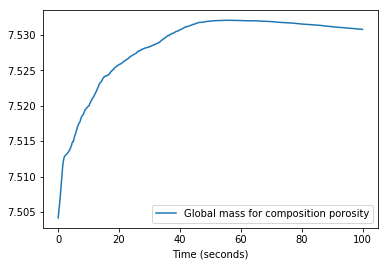

In [3]:
folder ="../"
dossier = folder+ "output-2/"

statistics = dossier+ "statistics"
data = aspect_python.read_statistics(statistics)

#data = pd.read_csv(dossier+"statistics", skipinitialspace=True, sep=" ", comment='#', names=names, index_col=False)
data.plot("Time (seconds)", "Global mass for composition porosity")

data = data.dropna(subset=["Visualization file name"])

visu_files = data["Visualization file name"].values
visu_times = data["Time (seconds)"].values

In [4]:
file = dossier+"solution/solution-00000.0000.gnuplot"

data = aspect_python.read_gnuplot_visu(file)
data.head()

,x,y,velocity_x,velocity_y,p_f,p_c_bar,u_f_x,u_f_y,p,T,...,density,viscosity,thermal_expansivity,nonadiabatic_temperature,strain_rate,p_c,fluid_density,permeability,fluid_viscosity,compaction_viscosity
0,0.000,0.000,0.000000e+00,0.000000,1625.52,126.003,-7.379570e-16,0.047973,1652.25,0,...,2,100.0,0,0,0.040579,30.8643,1,0.00,1,1.000000e+10
1,0.125,0.000,-5.867800e-17,0.000000,1625.52,126.003,-7.966350e-16,0.047973,1652.25,0,...,2,100.0,0,0,0.040579,30.8643,1,0.00,1,1.000000e+10
2,0.250,0.000,0.000000e+00,0.000000,1625.52,126.003,-7.379570e-16,0.047973,1652.25,0,...,2,100.0,0,0,0.040579,30.8643,1,0.00,1,1.000000e+10
3,0.000,0.125,0.000000e+00,-0.008518,1624.25,107.695,3.689760e-16,0.009661,1656.24,0,...,2,70.0,0,0,0.095703,26.3798,1,0.09,1,2.333330e+02
4,0.125,0.125,-3.495110e-17,-0.008518,1624.25,107.695,3.340250e-16,0.009661,1656.24,0,...,2,70.0,0,0,0.095703,26.3798,1,0.09,1,2.333330e+02


(-1, 0)

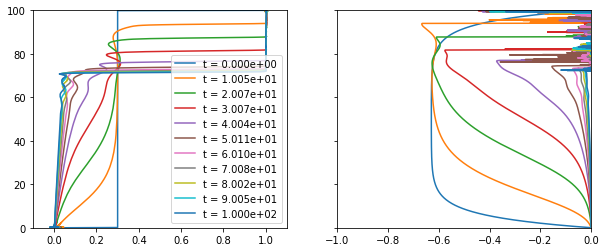

In [8]:
N=1

fig, ax = plt.subplots(1, 2, figsize=[10, 4], sharey=True)


for time, file in zip(visu_times[:--100:N], visu_files[::N]):
    #print(time, file)
    file = folder+file+".0000.gnuplot"
    df = aspect_python.read_gnuplot_visu(file)
    #df = df[df["x"]==0.5]
    ax[0].plot(df["porosity"], df["y"], label="t = {:.3e}".format(time))
    ax[1].plot(df["velocity_y"], df["y"])

ax[0].legend()
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([0, 100])
ax[1].set_xlim([-1, 0])

### 